In [ ]:
! pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
df_customers = pd.read_csv('./datasets/churn_customers.csv') #clientes
df_services = pd.read_csv('./datasets/churn_services.csv') #serviços
df_contracts = pd.read_csv('./datasets/churn_contracts.csv') #contratos

list = [df_customers, df_services, df_contracts]

In [4]:
for n in range(len(list)):
    print(list[n].head(), '\n'*2)

for n in range(len(list)):
    print(list[n].tail(), '\n'*2)

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No 


   customerID PhoneService     MultipleLines InternetService OnlineSecurity  \
0  7590-VHVEG           No  No phone service             DSL             No   
1  5575-GNVDE          Yes                No             DSL            Yes   
2  3668-QPYBK          Yes                No             DSL            Yes   
3  7795-CFOCW           No  No phone service             DSL            Yes   
4  9237-HQITU          Yes                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes       

In [5]:
list[0].head()   # mudar variavel pela lista
list[2].tail()
list[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


# TRANSFORMAÇÃO DE DADOS

In [6]:
# transformar coluna TotalCharges de String para Float 
df_contracts['TotalCharges'] = pd.to_numeric(df_contracts['TotalCharges'])


ValueError: Unable to parse string " " at position 488

In [ ]:
#transfomar coluna total charger de string para floar com coerce
df_contracts['TotalCharges'] = pd.to_numeric(df_contracts['TotalCharges'], errors='coerce')

# caso nao encontre um caracter que ele nao consegue converter ele transforma em um nulo 

### Após a transformação a coluna passou a ter 11 valores ausentes

In [7]:
list[2].info() #total charges com float 64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


# Renomear Colunas

In [8]:
# renomear coluna no DataFrame usando rename e dict
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
df_customers_renamed = df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})
df_customers_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
# aplicar o resultado do rename no proprio dataframe
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)
df_customers

,customerID,gender,Above65yo,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [11]:
# rename usando lista - modificar todos os nomes de colunas

df_customers.columns = ['IDCliente', 'Genero', 'Mais65anos', 'TemParceiro', 'TemDependentes']
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Mais65anos      7043 non-null   int64 
 3   TemParceiro     7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


# Unificando os Datasets - !!!

In [12]:
# quantidade de registros por dataframe - tem a mesma quantidade de registros : 7043
print(len(list[0]))
print(len(list[1]))
print(len(list[2]))

7043
7043
7043


In [13]:
# renomear colunas
df_services.rename(columns={'customerID' : 'IDCliente'}, inplace=True)

In [14]:
# unificar dois dataframe criando um terceiro dataframe
df_temp = df_customers.merge(df_services, on=['IDCliente'])

In [15]:
df_temp.head()

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No


In [16]:
# unificar df_temp com contracts, usando colunas de junção com nomes distintos
df_churn_temp = df_temp.merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

In [17]:
df_churn_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [18]:
# unificar os tres ao mesmo tempo 
df_churn = df_customers.merge(df_services, on=['IDCliente']).merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

# Remover coluna de dateframe

In [19]:
df_churn.drop(['customerID'], axis=1, inplace=True)

In [20]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DADOS AUSENTES

### DETECTAR OS VALORES AUSENTES

In [21]:
# detectar valores ausentes em todas as colunas de um dataframe
df_churn.isna().sum()

IDCliente           0
Genero              0
Mais65anos          0
TemParceiro         0
TemDependentes      0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df_churn.TotalCharges.isna().sum()

0

In [23]:
# quantas linhas tem pelo menos uma coluna com valor ausente - mostram as linhas do total charge
df_churn[df_churn.isna().any(axis=1)] 

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [24]:
# quantas colunas tem pelo menos 1 valor ausente - a gente ja sabe que a totalcharges
print(df_churn.isna().any(axis=0))
df_churn.isna().any(axis=0).sum()


IDCliente           False
Genero              False
Mais65anos          False
TemParceiro         False
TemDependentes      False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
tenure              False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


0

### REMOVER OS VALORES AUSENTES

In [25]:
# remover coluna que possui valores ausentes
df_churn.drop(columns=['TotalCharges'], axis=1)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [26]:
# remover colunas co valores ausentes
df_churn.dropna(axis=1)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
# remover colunas onde todos os valores sao ausentes

df_churn.dropna(axis=1, how='all')


,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [28]:
# remover linhas com valores ausentes
df_churn.dropna(axis=0)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
# # remover linhas com TODOS os valores ausentes
df_churn.dropna(axis=0, how='all')

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### INPUTAÇÃO DE VALORES AUSENTES

In [30]:
# preencher todos os valores ausentes com 0
df_churn.fillna(0)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [31]:
# preencher valores padrao conforme a coluna

In [32]:
df_churn.fillna(value={'TotalCharges': 0, 'Genero': 'Não Declarado'})

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [33]:
# inputar uma medida - media ou mediana desse valor
media_TotalCharges = df_churn.TotalCharges.mean()
media_TotalCharges

TypeError: Could not convert string '29.851889.5108.151840.75151.65820.51949.4301.93046.053487.95587.45326.85681.15036.32686.057895.151022.957382.25528.351862.939.65202.2520.153505.12970.31530.64749.1530.26369.451093.16766.95181.651874.4520.245.257251.7316.93548.33549.251105.4475.74872.35418.254861.45981.453906.797144.154217.84254.13838.751426.41752.65633.34456.351752.556311.27076.35894.37853.74707.15450.72962957.1857.25244.13650.352497.2930.9887.3549.051090.6570991424.6177.46139.52688.85482.252111.31216.679.35565.35496.94327.5973.35918.752215.451057927.11009.252570.274.75714.2571077459.05927.354748.7113.851107.22514.520.219.453605.63027.257611.85100.27303.05927.653921.31363.255238.93042.253954.12868.153423.5248.41126.351064.65835.152151.65515.45112.75229.55350.3562.93027.652135.51723.9519.753985.351215.651502.653260.135.4581.251188.21778.51277.751170.5570.456425.65563.655971.255289.051756.26416.761.3545.651929.951071.4564.35655.57930.555215.25113.51152.81821.95419.91024251.6764.551592.35135.23958.25233.91363.452736254.452651.2321.43539.25242.81181.755000.2654.55780.21145.7503.61559.25125229.9545.3662.652453.31111.6524.81023.8582.15244.82379.13173.355311375.48129.31192.71901.65587.46519.758041.6520.752681.151112.37405.51033.952958.952684.854179.279.91934.456654.184.525.251124.2540.051975.853437.453139.83789.25324.5624.6268.351836.920.2179.35219.351288.752545.7555.22723.154107.255760.654747.584.61566.9702114.1299.051305.951120.3284.356350.57878.33187.656126.15731.3273.42531.81074.348.554298.454619.55147.1540.22633.3193.054103.97008.155791.180.551228.65132.21364.34925.351520.15032.255526.751195.252007.251099.61732.951511.23450.1524.82172.0570.6401.15624.851339.8771.95244.75322.9498.2525.43687.751779.951783.6927.1570606.55435.41712.72021.21940.8567.8220.3520.255436.453437.53015.7573.61509.8396.1356.6541093141.71229.12303.352054.43741.853682.4519.251886.254895.1341.6415.555686.41355.13058.652231.053236.354350.1426444.8422.34176.75138.1880.05139.05973.651470.05739.35161.954422.95511.25155.85293.954759.856148.453565.6566031830.16223.84508.651328.1586572.1168.21303.5996.856430.92278.75681.4574.35371.9840.18468896823.4805.14016.7583.753959.152878.55945.71373.05492.55140619.156962.858126.65690.25181.5830.85608.43646.83662.2525.352566.55308.71410.253339.0550.654732.3590.855067.45214.754874.72348.454063442595.252309.5589.3367.553944.55965.953694.72524.451803.7415.1624.15237.77007.63848.8419.41468.7558122861.4519.919.6233.71066.152149.0544733545.051195.756858.91024.71845.975.3132.25515.452830.451110.5449.32838.555376.4858.61395.053975.71182.554784.45119.5518.9899.451183.8720.058468.23161.255.051882.555070.46049.51166.72937.656396.4569.551270.25759.557611.551642.751545.43582.42227.11417.92494.652768.352369.33875.1100.91614.05385.9673.258404.92799.756538.456588.95868.1734.35330.655564.41315.3574.71861.52747.2554.05453.4994.8225.7521451671.68003.8680.056130.8514156201.95 74.356597.25114.15139.43902.620.4903.61785.651397.65131.051238.453899.0556764543.154326.85502.551782.4851.8167.5502.8519.851818.36300.15334.85916.952852.44131.951546.3302.61929.35265.456989.4514424713.41758.634804738.38399.155430.35686.955706.3490.651360.25174.457379.8851021.755029.051955.46744.24946.78248.5601.619.55834.15972647.232666744.255265.5311.67966.98220.41153.25514.752596.15380819.92708.2760.0549.36033.389.05516.155861.75445.954973.41667.255357.753527.6422.61103.252754697.255614.453204.44747.653082.1597.93365.438.8233.5575.3346.21961.785.73342.4585.17422.16668.058071.051174.854352438.645.6713.75916.15237.24614.551414.451170.547.74859.254903.236086094.253084.92356.758306.056786.4248.95663.051357.14860.353418.2631.4186.36976.754884.85522.95362.65755.83355.65406.95137.62395.71968.16819.457943.454547.254687.92473.956562.9176.32236.26985.653109.94911.355794.65855.31620.22499.389.554287.2394.851899.6545.73442.15161.51732.6222.374.6655.3475.25164.3865.16132.73597.535.9697.6596.05428.720.054459.151167.6238.1145.151453.1191.054039.31039.451336.175.05493.42550.97246.151203.9562.25313.63775.85804616.05195.654188.471.149.91266.491.11623.44149.4520.452344.51013.05270.741720.656316.2168.154018.054811.64189.72848.452516.233.6208.452015.353739.829642263.42211.819.551683.715191164.051710.94245.554145.92664.31277.55589.334.751305.95381.3141.53105.55204.55605.9356.12758.154805.653941.792.751901.055730.72423.41653.453327.057085.53344.16697.352879.9137.11008.551551.6202.157882.258196.4202.9855.158171652.955600.15515.75 190.51842.81253.857.21269.556563.420.81907.85208.854758.81292.6363.151600.25275.73089.11175.6237.31444.6519.9454.153036.758065.6592.5184.656152.389.55154.5220.451510.352.22588.954874.83983.62003.61832.44908.253590.25023146.62339.3298.7143.652548.65507.4206125.45411.41058.25903.83009.5489.455468.451058.176164113.169.556017.657250.151108.2938.6594.152088.05178.75656.752317.15986.456751.353566.64889.3318.11563.951430.25644.35372.455453.41442.65610.7963.955222.33340.55292.85774.554487.344.42854.95905.555509.37589.8229.6394.189.9295.955459.2444.756782.156510.458476.54461.8562352.651424.96413.656309.6550.85898.64719.75457.35822.31463.5307.42104.55319.152337.45104.35084.65121.257015.955981269.13027.44634.35113.951582.7530774039.51665.21043.3504.2497.557511.65178220.05609.652857.63247.556215.3528235017.92619.2524.64965.12679.78310.555682.251120.954914.927.55923.51625.656068.655398.6918.6234.851231.85170.97984.15688.651288.37848.52671798.973.551643.554807.4521932239.41505.9255.351189.44786.151820.92404.15205.05952.37039.452538.051212.852651.11304.8360.1435.45308.05 434.57118.9320.45531.55382.220014919.75645.8215.877.62896.553395.8759.3585.15535.551253.15955.152162.644.71813.35245.152028.82723.75220.45365.8551.954054.245.7832.35112.360.655550.1174.890.554733.14048.951359.74542.357532.1569.9888.656383.351916413808.951886.486.61679.252656.5540.9519.75537.35678.84513.651423.85555.4225.55268.452917.52416.1424.451492.1132.4660.91893.95284.9784.25417.75016.251612.75119.753204.65485.2160.854145.25827.4549.5990.85696.355585.41601.2162.45470.220661426.45392.53861.452552.96668.35819.44615.252070.6273.753557.71957.1729.951416.755924.41697.77849.85649.44557.53013.051266.1360.351046.52347.9447.754209.953877.65152.3572.219.65526.95552.73208.65210.753706.95620.75412.5832.05185.551943.2505.98046.851815.3612.95795.152169.8973.12210.24853.751055.9144.5591.11304.8571321.15580.81497.94527.454590.35200.2614.454564.9 171.151012.4940.351047.72766.41622.451129.355680.92243.94523.257159.72839.9580.55580.12178.66038.55259.4324.15417.65168.155637.85839.4769.162531641.81678.052058.52424.5387.26293.452839.653145.92200.7914.44577.754997.54144.81493.554179.1893.551611593.054284.8544.551533.8529.83865.6515.759411133.6548.352070.058333.951209.251396.25723.35228.651161.7598.35775.31074.6535.552324.71072.6170.5196.91162.851677.8518.85370.43410.61138.85264.251005.75936.555475.9224.052326.0531.354991.51052.45831.2510.8283.951295.419.653011.658093.155610.253217.6519.85773.21029.35669.453593.81553.953953.151971.151236.1531964872.21500.560.153478.757413.553532256.753887.252490.15593.453510.3765.451259.355538.35340.85844.451348.953778611.654867.951505.05467.8574.9194.2571.4580.255253.951149.65740.8521.351412.651532.45250.051090.61446.82282.554300.451111.2190.14447.75143.3545.85810.21830.052820.654847.354729.34017.451398.62564.31685.95826.656066.55228.4270.21529.2168.6536.351888.45629.3545.3289.32117.254730.92033.05987.9545.055744.3575.819.45523.154805.359.056110.751596.61046.24424.292.75194.55612.16127.66671.75264.3303.74818.86448.057159.051574.52879.286.054159.456638.353112.057168.251326.252234.55495.158317.95679.862.875441188.25676.774.13242.51240.154111.355899.85632.955193.27530.8270.955460.21614.2402.51367.75483.77962.23810.83533.61396.91345.551646.458127.62680.1512811553.93207.552049.053629.25124.553474.45202.3147.586.3557919.453131.553928.3187.751710.1576.3569.252151.65961.11221.551496.451292.225.151713.11748.925.296.451114.55609.120.157133.25 169.45141.64688.65563.0559851258.6373.5857.22553.354322.85250.84549.051359.51639.3178.85633.855315.1735.5889.91290330.05237.956474.44421.952452.7813.854904.854484.052033.85538.279.22192.919.853858.05854.8347.45815.153970.43058.156145.2129.21165.949.9515544904.255632.551643.25740.553217.554888.22440.25620.5520.356840.953001.26254.2319.61938.05294.558.3442.85553546.45797.1761673.8343.457412.254039170.852948.61308.46078.753418.26603.83166.9865.756373.11177.055985.75732.57869.051504.05936.7741.46585.23122.450.451088.25615.352908.2739.9593.851132.757227.45193.61291.352023.55349.65153.955458.85244.45154.554507.152031.9550.05332.45473.9106.8152.61199.42555.052979.2654.853834.41534.754586.1520.555941.05424.152234.95666.75281547.874.6571.151756.65731.453475.55156.852683.2896.752407.34456.656998.9536.86547.74346.422651309.154754.31235.553562.57213.752082.95102.755914.451.251282.854738.8519.551775.8795.651454993.461.454018.551146.656081.41478.85243.652633.954735.351247.7574.73794.51008.72130.551313.555727.151372.91203.925.81215.12877.051579.75514.9596.172.455.252443.31970.5335.47002.95158.95293.151493.751093.41057.85190.05882.55300.41025.951436.954755388.155730.15819.55217.14896.351434.1937.1330.151474.96536.51128.16873.752199.0545.85457.1566.52471.63107.3518.35769.7591.7832.31555.6545.31790.674.95246.6261.65898.354509.55480.25653.151183.05639.45478.7520.05127.14391.45270.66710.53975.91704.95415.95950.21497.05780.153512.15273.253517.93375.97508.551245.055347.95493.651263.85385.55338484.21638.7165.4120.254473.45520.555717.8588.84312.52755.35994.556511.251218.657447.71169.35279.55720.353121.456468.65918.8675.63521.7923.11110.351611.652293.65553.2544.753029.13231.055129.455508.35655.91191.2866.42627.24741.454009.21463.455082.843.83707.6220.451133.71983.155746.75770.6134.056230.1573.053419.33587.253541.353801.3868.54859.11439.3585.879.1592.751185.9518.8134.54921.2901.255341.84859.951139.27082.45324.64812.754399.5663.55174.65321.75125.5548.950.157031.35016.654594.95611.452384.15319.85153.37035.6344.21431.651849.26083.1426.651655.351943.91616.15314.95804.85465.76669.051161.75947.758375.0534.73770264.84707.856152.4958.19436615.152200.25425.199.755044.86743.55196.4299.72093.9417.751725.41620.23169.555233.25967.85438.051421.9323.15318.6163.7639.652928.5100.35273.21608.151441.952168.153618.75692.6559.8569.65969.319.05418.88100.5519.5313.456130.9569.9745.31212.1183.751583.54162.051119.98013.55264.851102.458324304.51178.41421.756827.54698.05654.53268.054362.051386.9415.42614.11513.63161.680.954676.76526.65583.38078.13503.56669.454689.51201.15143.651292.6548.757108.21802.551505.151859.1168.5390.856339.451652.471.6577.56392.853264.54599.151134.251621.35947.32722.23058.31769.66293.751761.051642.75578.5954.9973.2543.851490.42801901.25716.44720930.9576.351676.952642.056770.851835.31588.2575.5258.351502.2519.26929.44453.33244.4323.452661.12697.41424.51401.151739.659312333.85949.85572.45696.81381.82572.9547.9545.1452122.4520.054931.8116.956937.951261.73273.81415.853958.22492.25279.21083755.5402.6325268.7546.245.1543.3936.852250.653857.11441.14338.61378.4545.952566.31711597.44744.356721.6247.2544.051734.6545.554539.35804.255011.153574.58086.445636362.3567.170.05165.451156.551834.153653.351477.651706.453953.71194.31327.85419.72145.1207.351083.72007.855882.752657.551527.5378.41612.276.65260.76441.85266.85124.6962.251382.9571.051399.35150167.27657.4865.056153.85174.21269.63862.556352.41348.550.9471.555931.751404.65726.11961.64194.854872.455118.95658.9581.0576.955809.7520.2415.9246.5996.953145.15265.320.921.054576.3189.1908.1549.8215.21500.955099.156385.95159.456885.755940.85668.851916.275.3575.454613.957261.252459.82048.8163.552888.72421.62292.75553.43465.71210.41291.35356.455200.83237.05576.65433.751868.45728.55825.7390.493.552845.153894.4886.41021.555885.4268.42204.351259309.16398.052257.756287.251662.051350.153600.651329.1545.7422.569.954627.656717.997.11710.45637.4117.952460.555464.652165.054941.8223.15181.1341.455731.85357.754616.14533.7589.25750.11410.25830.85743.545.37040.853865.456825.651340.1371.6511848477.77382.85456.85331.66056.15134.6125.51390.620.22511.32737.0574.370.62361.81730.356404165.351867.61043.3128.67455.4524.7206.152030.35869.43377.81346.24946.054065106.554964.74085.751742.756224.83415.256325.25340.251683.63966.3608.52896.61514.856792.454669.295.62934.36302.8779.2283.754600.75594772.8571.35857.87554.055981.651702.9467.1520.1569.7529311400.85137.851941.51932.751423.05970.855810.9223.9391.779.9519.3811.65174.753126.856841.453754.61406.65834.7627.4242315730922168.9980.3565.95711.91952.84368.852647.18477.654.3545281790.65845.61210.320.45854.452429.1100.45229.4544.451716.453023.5575.34837.62032.3436.970.5520.155893.951430.053133871.85458.12745.7341.351336.82181.75147.75818.457133.45348.8128.64674.41737.451498.8550.11797.75498.12624.25184.15498.84845.4369.16096.9160.752684.353004.156994.8273.255483.91233.65527.94985.91258.35111.443.95308.1383.652555.91284.27550.31110.0599.66707.154164.45873.75109.25179.251338.15862.48564.75926.21718.25956.8591.34824.451238.6579.5672.2382.24264.61070.71345.851045.253003.55467.557537.57482.13343.155427.05587.1100.8161.157028.55232.9225.85274.71180.953370.27111.35958.855999.851648.455753.254492.93956.72625.551233.41309813.451108.87349.35294.2929.2740754.53883.31414.23211.2371.61246.495.852545.76448.851468.91013.66690.752088.757240.65102.45830.251588.7829.3302.45712.251336.655360.756735.0551.210104847.053019.7161.65217.552583.75146.05567.457711.251384.755481.258124.2827.370.9220.953673.649.85576.652331.374.54495.656941.2340.351789.9908.551043.356822.1571.55157.555029.2581.77318.2420.457576.7633.4321.6549656151.91253.925.1545.25893.155420.652627.355037.55743.756589.692.456733.153410199.85593.37288.45229.84464.85068.05401.854451.856688.952661.173.051211.657030.651020.25597.656223.31024.652933.21258.382.97789.620673452.555468.951802.15733.553021.453687.851391.15274.351214.055510.651322.851973.752196.37843.553211.9130.15692.3585.56849.4203.952117.26565.85424.753306.85168.9253.8197.43838.22065.155064.451140.052447.451263.945.951838.1544.7511851743.970.1585.558529.56549.457806.525.76287.33251.8550.67904.25729.952654.052416.553520.755969.95226.81082.75565.754370.7590.052169.4550.655.456300.85160.05436.61781.3534675552.52835.53591.2588.3563.75617.15870.25601.25111.656046.13923.8777.3512.45141.45892.151682.053398.94984.851445.3305.55507.93640.452673.45389.82401.05651.55156.12796.3570.05407.056465511.25646.0535.93777.154903.151653.8547.51306.3463.660.65824.852094.65438.9847.3329.75674.55162.55546.957887.253186.651972.351527.35490.551531.4683.258058.852847.41133.9294.451719.15461.71160.455199.85163.3162.3883.351341.570.45659.4577.1535.251205.054917.9201599.31733.155149.54677.1119.34849.15424.255878.9244.85220.754261.25574.751501.7589.754541.2255.510722509.251440.751715.655333.353895.35869.9706.85512.252636.05814.75388.693.451389.852894.554025.61354.41856.4926189.2682.11778.71816.27069.251841.274.252656.71689.451054.752187.557334.051581.269.52404.85171.452839.453132.753942.45873.41529.656991.619.4803.3679.32791.57151681.64016.23281.657317.16474.45676.358164.11325.851654.857795.953952.452495.151230.25876.754263.451992.951982.1562.733.71090.1227.451250.8537.2892.7487.753713.95141.7678.28425.34154.87061.653364.552655.251425.45332.55963.955742.9278.851871.852866.454303.65175354.753759.05617.655935.194.62911.3982.952974.5198.71275.6540033791.6813.3780.25552.9408.25231.82191.155611.7246.251296.157082.855662.251215.457854.155255265.270.17129.457266.958496.72878.75261.33205.669.75279.256281.451131.3738.21137.0580.26341.456697.2260.819.6505.453655.451299.85564.851381.8188.11077.054922.42911.5826.183.4140.75377.8665.453617.16643.584.81559.37987.61547.355426.851127.352142.8287.854045.652757.8560019.84534.4540.92094.91584.81302.652238.555.555437.7590.75365.652209.151912.15255.555175.3670.653177.2590.356557.755791.853055.55196.1840519.751789.255000.056713.2562.62317.191.45828.85617.35266.9625.05301.46029.91842.7206.6604.77386.057334.051471.752626.15412.18277.05583.45369.251049.051414.8169.754354.452719.26365.3551.63190.25812.51143.84450.132971887151.8293.651308.12215.4482.82598.95216.4520.455064.85996.45839.6567332618.34084.35765.5793.55613.95402.851244.846.4581.85462.81540.2169.85168.16780.194.555.32083829.755294.66889.83254.356383.944.4477.74447.557321.05413586.05697.7168.65174.32753.869.25434.81077.595.65107.25851.220.955848.6109.819.65595.5329.82513.55135.352000.2931.757396.153958.85260.9297.31515.1816.84868.4688288.353229.651178.25185.4966.25758.61863.8265.832974107.3396.32809.051567.551851.456028.952072.755551.154317.35736.8336.151522.65622.94959.6329.951048.851001.5442.66703.53351.55779.25259.83483.454890.5136.75184.1513156767.1757.9568901657.43008.55262.058165.1875.552649.15220.651301.974.43326.27901237.65378.6592.6550.1520.45560.853638.251060.22921.754017.45854.94174.354920.5520.5810.3772.41936.8579.8202.251070.5347.65999.9113.12015.81454.25246.76017.95817.455595.347651201.65867.350.153007.25252.756306.56841.0581.95451.144.6226.27082.51017.35527.352146.5455.35969.851235.551014.252362.11225.651873.7386.56010.051850.657101.51043.41910.75716.11686.156716.457839.856236.7545.05712919.853309.2579.720.451254.72896.4717.5253.81110.05348.83888.6569.256843.15450.9432.251767.351742.45297.351820.451742.952444.25949.873.52970.83334.952010.954684.32181.551303.25371.42409.96155.4829.12602.94667824.755153.58182.8569.96683.41564.05755.63465.056292.71664.3198.16045.94108.155980.755043.21029.752854.557114.25907.05973.95605.75661.554116.94494.654259.33282.7555.71274.45493.952239.65480.75635.65038.15324.219.552793.552095648.6595.05917.151346.94242.35672.76561.25268.457337.55331.95194.054478.856283.32659.4196.9439.219.52107.153035.81866.451430.951071.66457.15684.053914.053842.6670.357880.2519.2298.453371.75442.4520.42345.5525.251156.356143.15144.8414.951059.55181.82212.552180.5589.15459.951036.752276.95211.95253162.65210.653566.72080.14040.25186196.151087.451672.151206.051113.95107.0538.156339.3184.11688.91378.25137.62191067.1579.553444.85369.057553.684.51813.13321.35707.57112.154641.17690.949.91380.178.6545.43094.656518.352585.9582.758.85425.96342.72030.756700.057244.73678.33486.65411.15937.51559.15970.42483.5828.23810.551493.245.8777.3556.354911.05187.35307.64318.354820.553038.552136.97472.15389.12296.25187.45261.2538.45299.23043.61506.4163.7323.251640762.13846.355646.653.579.0525.11516.62224.5888.754310.3542.92365.15353.655073.14526.85308.2519.45678.451237.31023.958182.754532.31444.0519.17372.657325.13474.2392.651058.63990.757475.85835.52628.61718.351023.91193.551205.55776.4578.91025.15856.351226602.91712.95682.2574.33635.15702.93734.251144.54454.2545.375.61117.55180.2519.8930.05110.15333.6465.051669.43545.1504.05440.21151.552475.351249.25317.75535.05461.3431878.35335.753121.4324.81394.553413.253143.65439.75664.44759.5510333482.852688.45435.252448.753072689.351329.21281.2535274348.65561.1563.65129.34285.893.75894.525.051160.753091.75365.55272.953632381.21035.5522342.2653.971.21498.24178.651821.85278.154024.255.256520.8854.98308.9109.292.053420.593.854068337.93168.751412.43974.7343950.4542.455461.45571.755498.296.85111.0594.4521.1923.85141.1628.655576.31046.11245.61287.851939.35118.25452.552696.55875.351267.05494.97995763.320.1106.9710.05568.21900.25159.158012.75856.65551.3184.954056.751096.653684.951752.457210.855264.52157.324.4433.952435.155607.752874.154433.3964.351974.81460.85951.551821.21600.95399.251218.5581.72171.153634.8292.4317.25218.555071.91423.353068.64690.656157.61442.653369.054671.653474.051875.55272.353645.05135.751319.85229.4370.2569.15714.21233.253571.683.38035.95579.469.63066.45305.557634.253653241.33870.3387.9527.578.452104.5520.319.23019.17051.951190.54448.8255.25146.91011.051714.95762.5535.3575.55338.92497.356273.470.25908.754913.3 46.3212.34443.45316.21079.05564.651095.656161.9446.052106.052511.55318.6811.87323.15186.054547521.951056.9544.15834.1585.45999.82369.76297.65239.5559.21461.45416.41060.64869.3554.93265.952254.2358.152939.84652.44408.45580.82495.2180.35913.95158.4104.21389.3519.41629.26033.144.495.13320.751867.7438325.451148.13972.25155.93673.1570.61126.7573.452413.056912.71581.955586.455846.656424.76018.653373.41537.91080.55355.282.852016.455327.25683.251263.05151.37714.65188.75549.4130.52621.751875.255685.8837.5401.56118.956480.91800.057104.24214.2550.6863.11992.269.81948.354750.951007.95036.92391.86859.056521.9617.85157.75516.323641687.957689.956239.052042.052807.14116.81317.954594.656332.753213.75229.554976.157308.954555.244.956982.51025.1590.555714.219.52274.35789.5548343131.8602.553369.252674.15199.751790.8449.7519.71400.3411.67415841.354512.75688.4531.96674.651345.751843.05196.951433.8214.55865.851358.63147.15131.054535.851078.75542.42312.55415.053250.4598.587.9754.6575.351952.25153.83198.620.95610.154519.52440.256860.61377.7190.251651.9578.37939.2544.9576.712791260.7267.356586.85934.15123.657534.6519.453645.6314.453053677.057965.95906.854888.7237.2574.6342.4140.11108295.55892.65198.254822.856741.1579.151355.457209438.47726.352070.751636.957581.53019.54729.756126.16333.46687.854158.253183.479.67149.351429.65472.651734.5113.51884.652568.15470278.42088.8502.62595.855825.550.754449.751208.351956.4310.6290.552096.12665543.820.353005.81623.152498.425863292.3651.44674.55232.352448.5658.13128.8223.45919.4653.951825.5943.1181.6545.65551.35359.4115.95165.22338.3546.33541.14146.051087.252522.481717.31734.27069.3742.93017.6564231164.34220.351558.72743.454055.52710.256055.55810.72538.26129.21750.8536.556652.452575.456019.351379.61284.2296.15653.25412.685.549.551928.771.257845.81750.7216.2178.5115.160292745.23721.93121.1990.451004.35157.653219.75572.854554.851847.551766.751462.0525.252193.22433.5641.152398.4861.855837332.4249.554475.9416.45788.6202.36994.64116.152263.451374.354915.15838.575.13715.654273.4545.820.52044.7530.551398.2520.1328.954680.0569.13778.23161.42188.45999.451888.653990.671.151240.2526352352347.857156.23089.6270.82901.84949.12198.9374.5761.951520.9190.2551634059.852281.61356.7231.4550.75242.44264.252774.553605.24069.9874.21145.351323.75497.05534.72455.0538.7947.43571476.2570.81448.6291.95903.151201.655921.35146.651759.4844.457774.05134.05140.95249.951701.65592.65135.757732.654282.4219.652018.166968.95224.853771.5196.75943.856572.853175.8529.1520.05318.924.452762.7549.55631.85232.55919.35749.25307.4245.15134.7555.88240.854266.41077.51115.679.059525.24079.554187.752391.15890.5137.255154.63119.9529.5966.556936.853496.3914.319295817.76110.2178.828.34352351.8186.15445.85912679.553581.64222.951994.35930.051505.85205638.3797.2571.651359.452542.4554.7989.0544.5587.3351.557297.756301.7210.33822.451048.456393.651489.38061.574.2518.755763.15238.51031.7 34.81319.954388.4420.22177.453950.85827.053913.3533.53756.45443.92599.95284.31740.83436.12462.5570.853110.1280.85411.75198.6103.76144.554089.45864.219.653249.45405.83363.87132.1593.554138.95121.75566.12715.31782.051742.52983.824485.91905.71565.74858.73723.65298.35970.451782405.74534.92415.951157.058297.545.752083.14681.75176.21001.21594.75212.47677.4815.580.15259.658109.82386.85340.35419.357990.051402.25749.358425.151171.55647.95708.87567.229.94348.1635.9108.9578.81682.46925.9223.155127.95874.86758.451874.3791.154639.45143.969.11776.55536.461721559.45607980.854029.952658.4383.5551.151745.52230.857281.61837.7149.55180.7411.451328.35576.9568.45123.0578.65468.35174.742.944172.35139.35539.85300.44968992.74718.255536.57806.6434.11563.91332.4545.26296.751284.23645.5161.45226.95646.851441.657511.35621.857919.8593.21423.6569.952763.35692.12298.552640.552911.81727.586.66705.7237.651672.352979.5695.751654.624.251857.85825.16424.25837.954126.2330.81337.45362.25991.054891.55373.12068.55487.054131.22301.15131.6540364900.655727.45743.054804.6524.051414.651443.652898.955309.520.4451.5550.55117.055839.31893.545.351654.45477.051415.55454620.5163.2849.9189.95321.98058.55482.87049.752560.1286.87982.55683.63994.05369.154631.7401.951534.051093701.31980.32893.4262.33886.855917.559142139.15948.73624.354753.855780.76869.71172.95662.951765.952431.95155.351859.23303.05134.353409.1709.570.5953.4550.1519.753665.555515.827266684052.4664.4718.55937.65812.62546.856944.51346.31544.05765.15692.5569.64059.356851.6578.051187.055401.9247520706.649.91370.3520.252215.2574214.41871.156171.220.2161.451013.2336.7333.656511.8393.457009.52264.056921.7600.2556.354664.151441.85623.7695.851028.754155.95395.66330.42971.76382034.252510.23419.52427.351760.253551.65122.91424.22111.452909.9537420.25300.85581.055676.653379.25942.95232.485.452088.4561371434.638702043.452215842.252576.21901601.63515.25605.453094.054929.55595.05469.88436.2519.75492987.955496.91908.35107.14575.354309.557922.75522.35587.73876.23778.851457.258349.45185.619.51066.9973.551226.45342.3985.053948.45828.0541.856164.72862.7533.6343.9520.76590.5717.952890.654885.851222.056871.7405.6208.251801.93062.451764.751816.751255.15743.053921.11463.45189.4596.8408.51846.658456.751011.54263.42549.13965.052496.790.6288.05368.17840.66632.751013.35152.953772.651026.3519.35031.85220.41416.5158.35256.65542.5568.58443.7791.755708.269.952016.3326.655471.7519.95346.41061.61971.5773.651422.0519.752460.35856.51275.857467.57261.755116.6660.056590.81208.151033.91885.152467.1989.452006.9550254830.2559.753088.253134.794.558312.44863.856871.96529.256637.93165.61454.156786.15431327.152404.15867.325.75114.7109.54692.95546.851274.051782.45301.1280.352897.953371801.36975.25257.051079.4540.16997.32217.151129.1979.054119.42568.553349.1492.11718.95605.251344.54267.151121.05918.7521.84469.13580.31729.351073.34566.5293.32603.11783.752440.1579.556322.157.44284.657138.651539.751058.1123.82781.85273120.7589.1497.3711.151607.21490.951898.13273.952929.75838.71443.657746.76951.15214.752669.45235.292.653103.25606.255330.21403.12727.85038.4519.180.31462.6150.65960.574.91192.3314.5556330.8877.352249.12807.651696.21032.054902.84995.355034.051857.751992.85751.6566.951714.95343.620.15520.11387.457383.74483.951706.451327.45974.3 4515.85179.855040.2165422.73046.420.25358.052936.251271.8530.0519.21808.71144.67446.925.17556.94858.76595149.054972.11880.852045.552187.15477.552976.95178.75025.853353.41461.152782.41699.151496.9452.24428.451322.5570.453563.8139.751927.33000.253021.32245.424.75944.651264.24917.752012.75743.31864.651221.651390.85302.351374.91336.91297.86067.41222.25487.952548.55835.5242.0544.7563.756218.45260.97320.92967.356333.8939.74200.255950.21037.7593.450.451614.91573.953624.3100.251468.752607.61422.169.85858.61523.4324.33435.6399.64549.45322.53273.555375.152510.73090.0561.0520.9955.6140.41493.169.41626.05541.151784.970.356075.95500.673.13229.43399.856431.0519.751230.9454.65235.0570.16595.95867196.35909.256449.15762.455283.951617.5785.7517765396.25574.5400.384.32656.31445.955212.656440.252244.9511306463.151131.2585.956252.719.952062.15587.1720.452186.42979.3956.653201.553973.2447.91335.2661.251111.857555493046.1569.35836.35272.25293.420.9550.552570798.280.5544.15916.96487.21855.651556.851988.055432.2147.558424.92203.7387.4116.653045.752287.25130.5767.9446.88100.25830.7204689.156754.353540.652184.61054.6130.551540.356411.251432.557629.85101.9313.46312.9629.552640.551372.451212.256237.056310.9503185.058672.452196.453008.15220.85779.6222.65914.6246.32110.1555601633547.65969.852610.656567.94747.851759.55101.16496.154234.15300.759.554323.351466.18684.81776.452933.954370.25144.354804.751125.239.85422.4251.758332.15314.64331.46382740.3600.155538.87049.5690.5279.31427.55452.719.451709.1553.15777.35860.855012.1166.32404.17024.44820.15209.9610.753409.670.7155.351447875911.61270.2478.11561.5761.852282.951615.11097.15369.36725.331.556293.2432.5321.75147.152434.45532.1375.25125.951042.651620.252387.75659.352660.21285.84211.55377.55990.9193.86058.95964.9790.152467.752322.8572624854.37748.751914.96470.157.42019.85688.051522.71334.5252700.455655.456747.355265.15174.35105.62271.852966.951772.2561.15494.9544.455290.453346.85219.65217.5607.75431.46004.855957.95442.054370.254428.6416.453067.26688.120.254224.774.354042.262.053580.951198.81755.353772.52877.95357.71397.3959.93182.953704.154620.48312.75541.9929.3971.31285.051521.23389.251198.053414.65162.45754467.15216.9373245.2481.1302.751728.22964.052156.2560.11051.978.9550131738.92275.15511.6598.51316.97993.319.851388.4566694.45244.654134.72375.44862.52431.35351.5106.214131743.05657.51050.5426.354982.519.551451.97634.8235.053116.1571.12633.449.656979.84920.846.351021.85276.18289.22659.45196.75945824.751517.53479.057365.71331.051195.953946.94299.9520.31424.95193.6620.554391.251993.82597.64213.919.95017.71052.354916.42959.87559.5553.957133.11799.3829.551312.151597.05524.354191.45711.952201.75806.951620.456812.951837.969.87344.45545.151500.252283.15494.051376.5755.4825.4488.652841.55486.852075.15299.65204.71356.35042.75812.46605.552995.45505.953509.46991.9590.352789.7137.951123.157953.25349.81067.053527.337621248.93035.354300.86065.3144.953233.65438.91081.452308.61882.83255.351067.652065.44136.4221.938488022.85173.15781.254510.85317.84779.45250.11745.274.94140.13670.51167.8469.6558.9333.553171.1574.71381.2455.53645.51158.856954.151672.13152.54307.12530.46141.653186.71054.85430.65849.9151.75299.41086.752692.751389.63767.43641.52535.5535.756880.853753.2637.55181.65329.5544.551539.82209.75223.757751.71174.354385.052606.351539.4518.91261.3558.15225.65969.3253.9400340.852515.3227.35305.95365.42357.75198.5554.2590.8569.4742.95251.655597.6520.154816.7768.051215.83522.651834.95305.1910.45155.653656.2552150.85389.251873.71261108.77346.23708.4469.6544.11385.85548.8712.7564051637.42536.556042.7958.251730.65459.6201.95285.26145.851529.454664.51740.7552.953496.393.77053.35301.55312.71046.52960.1834.26953.44134.85899.8541.5116.857942.155321.254156.8223.6768.453765.052157.5108.051391.651379.81273.3810.451810.857782.8570.31797.1377.85445.3851.757624.2355.1575.45906.851057.5519.41388.751641.31375.15152.7185.2195.051826.7417.5344.516602180.552835.945.152730.855437.120.26981.355794.45747.21267.953674.951275.65893.9724.651536.753615.6607.34154.552184.351852.8577.15847.82390.451923.51493.2338.13030.675.352184.851031.4921.33875.43124.5144.1566891451.16368.23729.6350.12847.2452.351494.5930.4541.851272.05475.1673.1208.7150.7531995844.652462.66263.83403.4237.75221.3575.31672.17881.22320.8370.54062.23043.72723.41081.254097.05632.24042.3164.858166.84113.73047.1570.44193.43729.75399.45331.31964.61336.151147.45486.051078.95925.757804.154747.21028.9226.454364.14692.552433.91217.2519.75154.36382.557623.21261.4589.2586.056779.05434582.851714.55893.2810.856347.551123.6543.1535.113883851.451743.52638.1946.951114.851777.6684.8574.351312.45159.2610.2404.3569.656363.454124.65713.1950.7519.65505.951149.65169.65526.7393.1511473021.65718.2191.354539.66397.6280.42718.35711.053478.1536.454133.952917.6554.32964.82198.31189.91914.52001.55336.357238.67998.83825.855703.257397164.66555.2225.65955.753382.32313.8933.3780.857852.43184.25764.9527631614.7145.4156.251604.5270.15 20.61734.57047.5573.151538.64459.87459306.05639.7348.154533.95563.651587.5540.25842.94228.55784.453729.751406.91857.37322.56725.53627.31761.451725.954192.151411.2164.52724.6264.554671.71173.55318.57713.552471.257842.32227.84990.253744.057220.352351.452989.66077.754070.952479.052134.36000.12203.1183.156194.1638.952139.2831.75521.31337.57181.956082560.1577.659531790.152531.44760.3292.85953.651985705.05609.920.5579.656993.654122.655762.951537.852603.35566.45431.92258.251092.356401.252812.280.052698.35616.91912.85849.13460.31465.7590.15555.31278.82907.35146.351.254952.954504.945.64520.15267.352316.858075.352302.357251.92078.556225.41242.2599.45288.05599.253462.1853934.12375.22813.051222.85293.26314.3519.11003.051593.12509.953187.6574.452345.23330.15522.72335.34798.48594.4970.557665.83686.051115.1525371393.689.354445.3978.61258.15331.35291.4453.7584.751715.11715.151597.251250.13996.85215.1235.5673.21442.25639.055222.357291.75799.6550.8424.5249.44415.755270.6144.552447.952884.93050.152534517.25436.2118.419.93649.61200.15255.62395.0570.65083.55389.6644.5523.539.3989.052406.1638.55191.14524.054664.23470.86910.34014.212882277.656375.824.85251.751505.456903.1913.35535.8815.551411.655602.258244.3741.54375.81008.75968.43096.93901.252613.4853.15661.7794.25695.05160.85552.053275.154236.654.51174.35741.73019.25962.94759.751498.351233.154882.85411.6519.65148.053930.556895.584.656856.952658.83766.269.55129.55347.25581.7354.05929.456793846.754480.744.35499.41553.2219.55311.85586.052576.86435.251993.251923.85939.884.63092.65415.555986.555487651.545.473.652405.054458.156856.4550.754735.2682.154525.8321.05335.651424.41748.55474.9668.4926.251077.952541.25461156.13694.45382.81167.8746.753912.9368.8520.21654.71940.85221.71794.655289.8501.26140.8548.45309.25201.16179.352838.755.74589.853735.4570.15477.552553.71342.151216.357578.052603.9542.76056.92983.65689.352025.11747.24657.95296.18016.681.1433.520.556428.45883.851043.86252.91857.25146.4240.451724.15315.3429.55356.15488.2555.71298.71378.75973.45384.258543.25389.955731.8520.654275.7584.51924.1669.855784.35166.24060.55267.43532.854914.85315.869.85775.65445.9553.551007.8833.556579.051004.578561183.052169.75896.919.3501.354126.3549.652460.15477.6370.65265.752424.451849.9561.051698.551910.6998.1890.6529.51383.6493.448.61207563.5864.552109.35701.052265.25220.65749.82796.455165.75696.620.22076.0544.2215.251859.57470.1229.52470.12092.95629.55469.85733.95485.251244.520.053994.4578.251131.5184.0519.91178.75667.75629.1519.95109.379.6958.45403.1575.976.24392.519.2531681096.6669.452343.853588.448.6522.957511.9172549.751691.92248.054479.23471.16370.253314.15865.55852.71930.991.43949.154304409.91554.93472.05117.83210.35207.419.753132.7560649.6520.852106.3352011.46205.5903.7503.63882.3879.8383.654390.2568.2452.853291758.95737.61152.77674.552157.951219.852414.551155.67548.11809.351564.419.6575.784.4864.85228.757752.051951470.64060.9384.53432.9108.653952.65463.05494.053416.851498.652867.754807.3571.35471.351041.87689.81132.3518151311.3199.451637.31326.356376.55935.920.051611.1520.66989.72779.51931.758331.95735.92283.31445.2818.052333.051992.555890916.751029.81796.5533.7454.051392.251049.6734.6475.170.151540.051978.653181.8229.75625.556581.91347.153808.23974.157661.82479.25266.65601.41982.6339.94828.055980.554808.720.33692.851068.152383.669.6589.31438.05917.456096.453078.199.95475.22036.556444.051426.75767.557932.54040.652768.651672.35474.8446.11345.652425.42077.95416.31663.51286.0535.851094.357719.5514.61451.64932.5715443.65330.25746.5122.744.46631.8582503561.151763.552419470.25234.9570.379.3530971709.11848.8723.3809.751470.95577.156914.95602.9124.496.83827.9533.052961.43264.45995.352815.25154.8246.3257.65757.27517.71234.81389.23836.31474.756001.45720.12832.75472.251460.651336.356388.65153.05677.91165.62119.5921.557268.35847.25444295.351351400.5569.651380.41060.24386.2865785.552.052018.479.452727.3263.65275.42816.65538.5948.9846.84783.52997.455897.4470.6524.5269.6547402341.51789.651626.4800.35060.851448.84254.85466.64627.86838.6851101.8544.320.24297.6414.1256.63969.352274.11296.81268.858192.659.251147.854361.552006.12078.957609.75487.051218.451416.2483.31234.61311.65618.36185.151237.85498.1294.452381.55788.35756.4613.43625.2550.354793.81267.2442.284.85654.855567.453160.55740.35706.23085.3524.73541.484.250.71165.554855.352806.91422.65608.15641.354959.1535.91321.31663.753024.152188.54138.05102.5872.652724.25413.251374.2757.16692.65218.5608.81004.751125.63847.69781387.35746.05304.61098.851139.24368.95827.720.35262.05279.553512.51483.254653.85151.754400.758033.11253.65552.6510364025.5928.424.9460.256506.155598.34374.55678.752191.7239.755485.5609.05683.75404.25189.755060.9233.657176.55291.45689.753263.91993.2254.5347.65967.9242.951841.9232.1809.25866.45360.552076.2355.97299.652291.2129.157491.755835.57031.457723.9103270.75109.6727.8130.75893763.1781.4902.252653.651016.75943.65275.73126.451070.153457.9340.44299.21093.2521.91630.4713.61265.654003.851401.445.31510.5178.1264.8480.64541.94976.157542.25251.251595.523.45685.553874.16891.44916.95137329.749.86039.91548.653440.25151.34226.71023.7555.490.67074.4156.356849.753263.61252.8567.5570.257501549.751810.552952.857467.555484.4294.997.55916.45113.3519.95476.8101.651130.853532.256891.451570.7520.957854.93581.41447.98547.15727.85357.6159.35280.856069.253274.3513591777.96109.651122.42020.93795.454504.553579.1549.7276.58175.9890.35259.85588.850.6585568.352203.65938.952024.13623.952369.053877.954577.925.852871.5672.551573.71270.557711.45126.052193.6564.5531.238.253348.1533.62907.551620.83480.35293.853243.454137.279.2544.919.45348.65659.653180.5118.53023.853365.85195.31031.1997.656471.856241.356501.352317.12237.555231.35275.8165.5358.56614.980.52421.751294.61299.15733.4305.557430.75900.5630.63856.751222.65374.816257234.8331.853959.355088.43969.44860.85788.051266.35470.95688.2387.7845.25560.64230.254983.054113.1525.7521471.855976.9506.94299.757548.61654.7580.354551.56227.520.0576.451457.51474.35880.23270.2569.953919.157285.793.3169.057658.35959.35295.74693.23512.95231.23603.45217.456875.3519.252021.352564.955611.757610.135.057345.754543.95450.41297.354442.751423.154378.3574.22716.370.1450.651175.85558.82220.13283.05142.354939.254237.5335.9533.27188.5926.251119.35116.668.8287.42341.551362.85163.62254.2145.157752.36585.354786.13835.5539719.71027.251580.17222.753769.74233.951680.253725.5413.657707.7714.152497.28309.55601.55139.251888.252773.95409.755643.4197.7401.33238.41573.0579.15235.81364.751985.15655.85303.154335.2647.51574.452748.72483.656367.24904.22044.951794.87173.156441.47039.05921.44018.355448.620.2549.92085.451358.855135.15730.12869.85118.2549.251108.61815.65730.475.455071.054014.6568.855860.77279.351064.955769.65886.854238.4520.3418.3136.05708.2788.55700.854378.83442.8181.77171.74016.8555396.854122.91482.374.31240.844.651095.3788.86578.5519.552802.3857.75184.4364.556093.31861.120.41079.657475.12862.553069.452349.8469.254213.353301.053529.957723.74144.94265154.653246.458337.455731.46176.61905.4931.97348.8776.255243.05141.657679.652954.51006.92540.13097.23807.3524845785.652619.151524.852790.651784.53937.452276.12029.05802.35418.44653.25275.9343.452130.451191.450.525545589.45467.774.43756.453334.9920.53431.75150.352587.7367.955125.754801.16219.619.55550.17862.251242.24871.053190.652666.753533.6792.15295.651459.354398.154297.95167.34096.93454.612861387786.3641.25705.45345.5345.95811.894.4124.451375.63491.557920.76640.755718.1320.4101.451334.453358.654764350.3570369.518.85525.5569.2483.15934.8786.569.654086.35364.882.320.3770.46816.952419.554138.7267.63457.451115.25435.64186.325.054630.23221.25688.5867.14746.05712.8548.95355.145.35764.7167.3428.451505.35693.45930.41177.955069.65324.251458.1156.42298.91679.65369.629985206.553626.124.47968.85152.451959.52053.05398.551130.853425.354323.45703.551275.72965.75164756.252249.956109.75159.43751.1568.65411.25105.53320.6327.455669.5465.45704.31369.81107.2595.556375.28152.31566.75130.25162.15110.051885.156302.852264.5816.81253.541.25265.55693.35997.13824.23886.057283.25412.551070.25817.951171.36548.65625.651911.570.85134.715072978.3299.35832.655567.55450.84166.351215.691.77898.453915.4979.590.057432.054026.425.31193.0520.1398.551958.4569.963.151301.1484.0545283887.852208.75238.1580.8958.15118.376.453845.451094.5573.751267633.456129.651218.251405.32274.974.51068.85533.9676.153804.41118.85236.41386.8762.251902239.055673.739.8997.755574.35406.05138.85123.651801.1689790.7582.51618.21173.35900.92122.056719.969.1537841798.6554.653886.451224.052310.2723.43988.53554.6 6034.85531.685.11732511.953893.6357.15467.52288.74627.85289.16460.551931.3402.62221.557758.9172.85224.57388.453460.951700.93090.651293.8645.85224.95500.12427.13488.151035.77565.3527991601.585.56256.21232.919.91937.41096.255059.753023.654889.22289.96503.21313.25990.32285746.15209.11864.25979.73902.457142.59024481805.2154.85528.458349.74953.25332.65470.22259.351411.35593.756328.71411.96841.420.35238.53233.851062.14016.3226.557110.755440.9235.11958.95855528.91463.71025.05552.13815.4 3313.41938.93014.65460.254839.15184.419.92010.555139.6569.21673.4309.353171.68670.1916299.75702.052354.83473.419.654438.24819.7592.2515671242.45559.2220.1531.151183.2465.856876.055013782.4460.220.21790.35733.3513347767.25876.154600.95113.551793.25886.77737.551348.91686.851879.254013.8434.57195.35780.1107.63801.7308.7438.2550.353778.13147.55438.955102.3570.31872.2213.355617.755386.51776.952483.05235.655224.352272.883.754663.4201.7125684.4620.351146.051806.356035798.3519.15497.61301.71129.7519.3266.95257865.82623.6545.8579.551082.8147.82570.24378.93616.252924.056014.8532.72882.251509.95305.052368.47985.93545.351301372.452985.2577.75564.3595.451311.751135.72319.83720.355025.85224.56185.81498.551208.66613.6569.7573.31818.91787.351051.057181.253688.699.75871.4780.5821.6239.45244.453357.9129.64977.2365.35334.652424.0543.954981.152090.2545.14905.752038.740142441.727511307.8383.652868.05449.7553.557882.51087.7791.77493.054414.36841.3819.956052.253361.054869.5509.34308.25221.13833.9569.35294.954092.85316.92651.2471.7216.755720.95503.2569.67365.37245.9385961.44615.93251.33880.053088.75139630.553.056859.52108.356770.54730.61151.05232.551022.65121.31127.2309.4523.14250.1770.5246.733423930.61747.852754.45897.752780.65895.452208.052196.151692.620.5265.351836.256418.94871.454947.551558.654284.21218.255617.9524.2679.85554.455237.42032.3789.21525.352804.453726.151652.11588.753366.05778.17113.754367.35993.155012.352728.62093.41011.8106.851343.4130.16794.751022.53691.2486.24036.854685.55256.251917.174.45272.155150.553756.43645.752874.4549.951020.7570.65826239727.87544.36479.43626.351679.4403.35931.554326.25263.0539.253316.175.752625.256886.251495.1743.31419.41990.57362.9346.45306.66844.5' to numeric

In [ ]:
df_churn.fillna(value={'TotalCharges': media_TotalCharges})

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Distribuição em variáveis categóricas - ANALISE UNIVARIADA

In [37]:
# como identificar possiveis valores unicos numa variavel do dataframe
df_churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [41]:
# contar cliente usando a variavel churn como referencia
print(df_churn.Churn.value_counts())
# obter com percentual
print(df_churn.Churn.value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


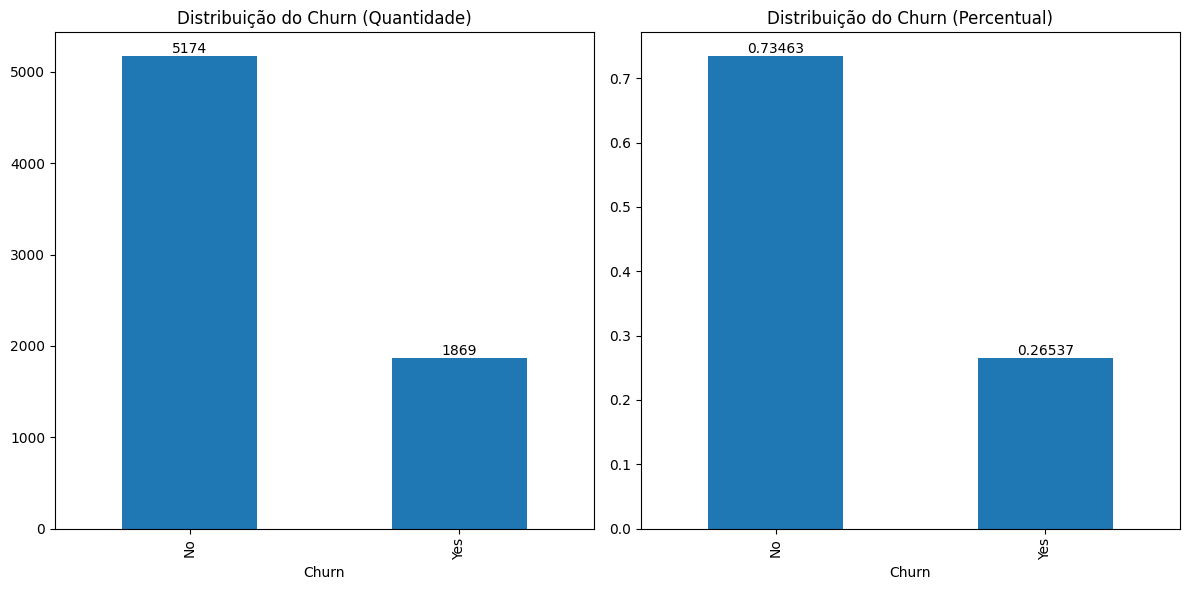

In [66]:
# config o subplot com 1 linha e 2 colunas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# distribuição do Churn (quantidade)
ax = df_churn.Churn.value_counts().plot.bar(ax=axes[0])
ax.bar_label(ax.containers[0])  # mostrar a numeração da barra
ax.set_title('Distribuição do Churn (Quantidade)')

# istribuição do Churn (percentual)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar(ax=axes[1])
ax.bar_label(ax.containers[0])  # mostrar a numeração da barra
ax.set_title('Distribuição do Churn (Percentual)')

# evitar sobreposição
plt.tight_layout() # meio redundante
plt.show()


In [62]:
# quais os tipos de contratos - mostra os tipos
df_churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

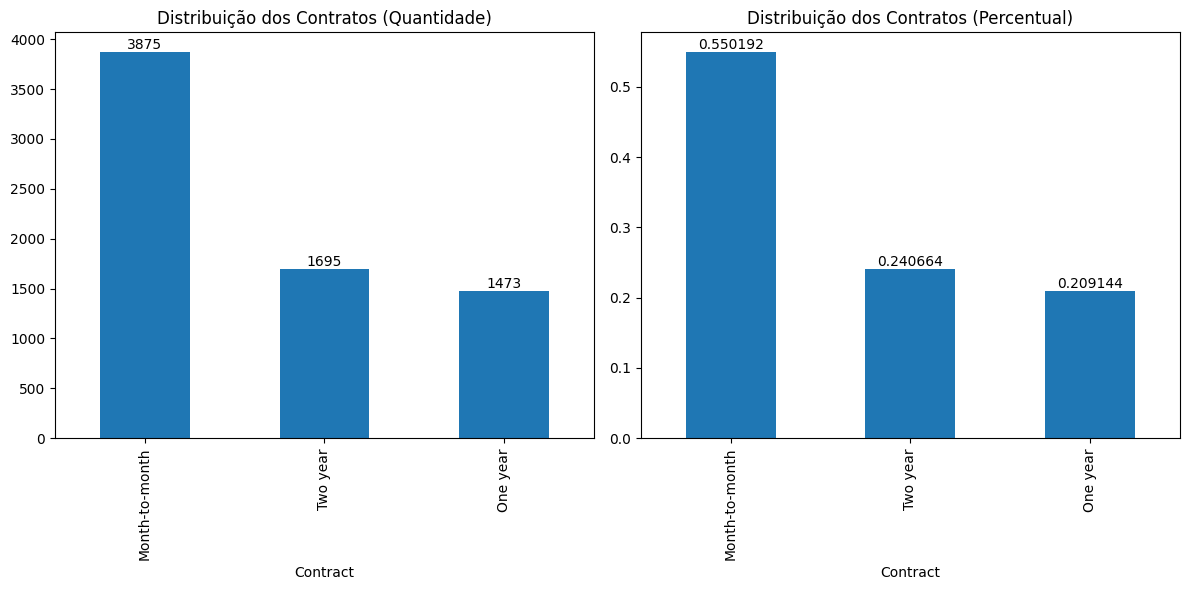

In [67]:
# config o subplot com 1 linha e 2 colunas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# distribuição do Churn (quantidade)
ax = df_churn.Contract.value_counts().plot.bar(ax=axes[0])
ax.bar_label(ax.containers[0])  # mostrar a numeração da barra
ax.set_title('Distribuição dos Contratos (Quantidade)')

# istribuição do Churn (percentual)
ax = df_churn.Contract.value_counts(normalize=True).plot.bar(ax=axes[1])
ax.bar_label(ax.containers[0])  # mostrar a numeração da barra
ax.set_title('Distribuição dos Contratos (Percentual)')

# evitar sobreposição
plt.tight_layout() # meio redundante
plt.show()